# Titanic Dataset

# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Data
train = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/train.csv')
print(train.head())
print(train.columns)

train_orig = train.copy() # create a copy in case I fuck it up
test = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/test.csv')

train.describe()


In [35]:
# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Data
train = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/train.csv')
print(train.head())
print(train.columns)

train_orig = train.copy() # create a copy in case I fuck it up
test = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/test.csv')

train.describe()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Index

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Import the data and get a sense of what is inside...

In [36]:
# Check current datatypes and get a sense of values
# print(train['PassengerId'].unique())
# print(train['Survived'].unique()) # 0 = no
# print(train['Pclass'].unique()) (category)
# print(train['Name'].unique()) (text)
# print(train['Sex'].unique()) (category)
# print(train['Age'].unique()) (float)
# print(train['SibSp'].unique()) # number of siblings on board (int)
# print(train['Parch'].unique()) # number of parents/children on board (int)
# print(train['Ticket'].unique()) # ticket number (number)
# print(train['Fare'].unique()) # Passenger Fare (amount paid)
# print(train['Cabin'].unique()) # Cabin Number (text)
# print(train['Embarked'].unique()) # C=Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# Check for missing values
print(train.isna().sum())

# Print out pretty picture
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(train)
plt.show()

In [ ]:
# Fix Datatypes
train['Sex'] = train['Sex'].astype('category')
train['Survived'] = train['Survived'].astype(bool) # since this is our output variable, it's not really important but ...
train['Pclass'] = train['Pclass'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train.info()



## Fix Datatypes

In [ ]:
# Deal with missing data (cont'd)
# For age -> let's try to model the age based on other factors:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

temp_data = train.dropna(subset = ['Age']) # create temporary dataset without rows missing age

y_age = temp_data['Age']
X_age = temp_data[['Sex', 'SibSp','Parch', 'Fare']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_age_corr = cat_encoder.fit_transform(X_age)
print(X_age_corr.dtype)
# print(y_age)
#print(X_age)
print(X_age_corr[:5,:])

# lin_reg.fit(X_age, y_age)




# Deal with Missing Data: <br>
Age (lots!) - very important <br>
Embarked (2) - maybe important... <br>
Cabin (lots) - maybe important (PS - yes, important because letter at front indicates WHERE on the boat they were located) <br>


In [ ]:
# Deal with Embarked first - for now, just use mode response
embarked_mode = train['Embarked'].mode()
train['Embarked'] = train.fillna(embarked_mode)
train.isna().sum()

In [ ]:
# Remove nans


# Convert some datatypes


from sklearn.preprocessing import OneHotEncoder
train_cat_var = OneHotEncoder.fit_transform(train[['Pclass', 'Embarked']])




In [ ]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('The proportion of women that survived (based on training set is): ' + str(rate_women))
print('The proportion of men that survived (based on training set is): ' + str(rate_men))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")







PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


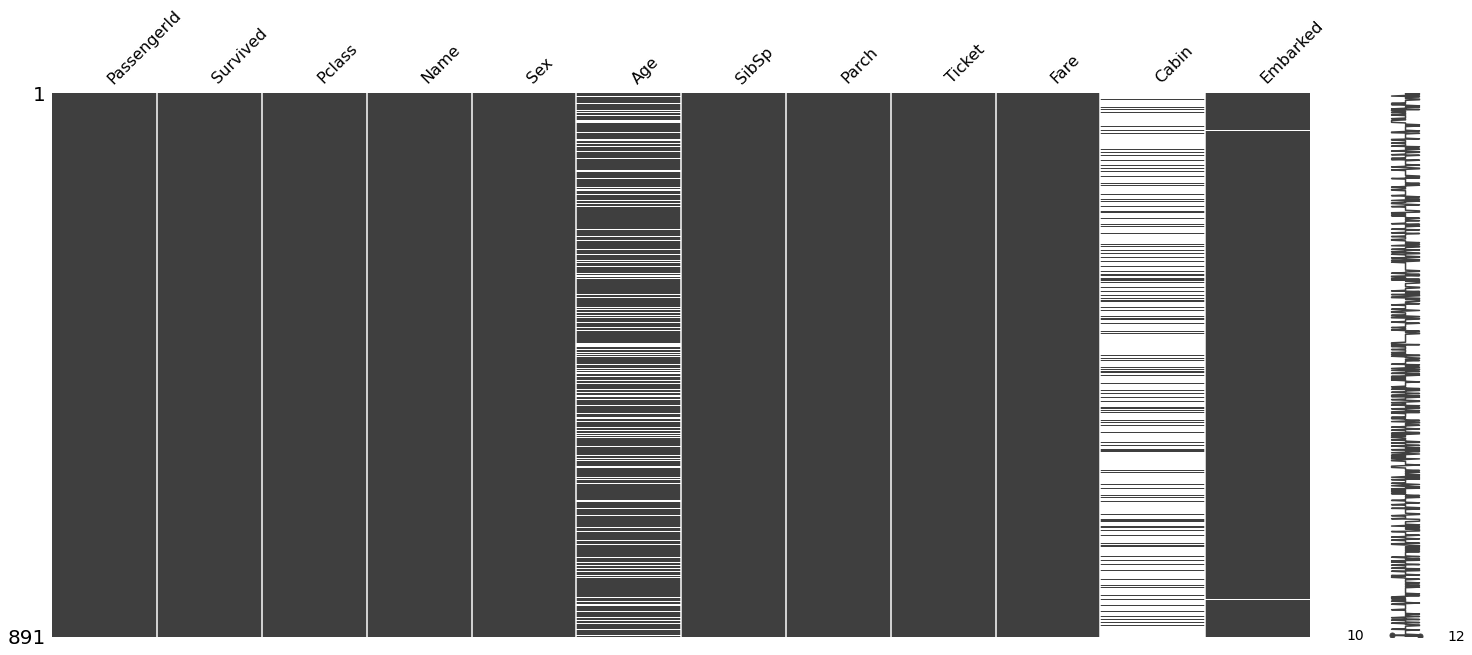

In [38]:
# Fix Datatypes
train['Sex'] = train['Sex'].astype('category')
train['Survived'] = train['Survived'].astype(bool) # since this is our output variable, it's not really important but ...
train['Pclass'] = train['Pclass'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train.info()

# Could



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.6+ KB


## Fix Datatypes

In [48]:
# Deal with missing data (cont'd)
# For age -> let's try to model the age based on other factors:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

temp_data = train.dropna(subset = ['Age']) # create temporary dataset without rows missing age

y_age = temp_data['Age']
X_age = temp_data[['Sex', 'SibSp','Parch', 'Fare']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_age_corr = cat_encoder.fit_transform(X_age)
print(X_age_corr.dtype)
# print(y_age)
#print(X_age)
print(X_age_corr[:5,:])

# lin_reg.fit(X_age, y_age)




float64
  (0, 1)	1.0
  (0, 3)	1.0
  (0, 8)	1.0
  (0, 31)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 8)	1.0
  (1, 195)	1.0
  (2, 0)	1.0
  (2, 2)	1.0
  (2, 8)	1.0
  (2, 47)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (3, 8)	1.0
  (3, 178)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 8)	1.0
  (4, 49)	1.0


# Deal with Missing Data: <br>
Age (lots!) - very important <br>
Embarked (2) - maybe important... <br>
Cabin (lots) - maybe important (PS - yes, important because letter at front indicates WHERE on the boat they were located) <br>


In [44]:
# Deal with Embarked first - for now, just use mode response
embarked_mode = train['Embarked'].mode()
train['Embarked'] = train.fillna(embarked_mode)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# Remove nans


# Convert some datatypes


from sklearn.preprocessing import OneHotEncoder
train_cat_var = OneHotEncoder.fit_transform(train[['Pclass', 'Embarked']])




In [49]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('The proportion of women that survived (based on training set is): ' + str(rate_women))
print('The proportion of men that survived (based on training set is): ' + str(rate_men))

The proportion of women that survived (based on training set is): 0.7420382165605095
The proportion of men that survived (based on training set is): 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

# Step 0 - Get a sense of the data . 
What type of data are found in each field?  
PassengerId -> numerical, 1...x . <br>
Survived -> 0's, 1's . <br>
Pclass -> 1, 2, 3
Name -> Name
Sex -> 
Age ->
SibSp ->
Parch ->
Ticket ->
Fare ->
Cabin ->
Embarked







In [ ]:
print(train.unique())

In [ ]:
%matplotlib inline





